# Compressing images using Linear Algebra

We all have studied some degree of linear algebra in our high school and some of us even studied it rigorously in our graduation. But linear algebra is more power-full then we all thought. It comprises of algorithms/methods which helps a lot in the real world specially in the study and manipulation of images. Images are one of the highly used medium of communication in today's digital and social world.

We all share thousands of images, memes etc. to our known ones. But when it comes to sharing large image files we need to compress it such that the size of image got reduced significantly keeping the image quality and content as good as possible. Images are represented as 3 dimensional(2 for height and width and 1 for channel) array/matrix of pixels, and we all know whenever matrix is coined linear algebra appears automatically.

This story is divided into following parts -
* Linear algebra refresher 
* visualize what a matrix do to a vector
* visualize what a matrix do to a shape
* matrix factorization and SVD
* Compressing small dummy image using SVD
* Compressing big real image using SVD

## Linear Algebra refresher

The two core element of linear algebra are **vector** and **matrix**. Vector represents a point in euclidean space whereas matrix is a linear mapping which maps vectors from one space to other (both the spaces could be of same or different dimensions). Here I coined the term **linear mapping**, it means *the mapping from one vector space to another respects the underlying (linear) structure of each vector space i.e., it preserves the linearity*, (vector space is just an abstract representation). Mathematically, we write as



Here, L is the linear map also known as linear transformation.

This is all mathematical jargon, but what it really do geometrically? So, *if there is a vector in euclidean space then it will either scale it, or rotate it, or do both sequentially*. Let's visualize what a matrix(linear mapping) do to a vector in euclidean space(R2 in this case).

### Visualize what a matrix do to a vector
We will first create a random vector and random linear map.

In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
u = np.array([1,2])
u.shape

(2,)

In [3]:
np.random.seed(42)
M = np.random.randint(1,5,(2,2))
M

array([[3, 4],
       [1, 3]])

Now, we will transform random vector u using linear map M, this will give us transformed vector u which we call as v.

In [4]:
v = M @ u
u, v

(array([1, 2]), array([11,  7]))

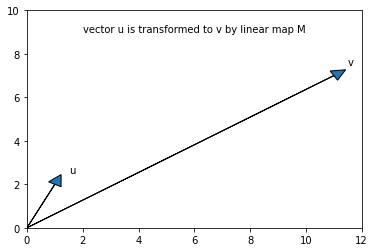

In [5]:
pyplot.annotate("vector u is transformed to v by linear map M", [2, 9])

pyplot.annotate("u", u+0.5)
pyplot.arrow(0, 0, *u, head_width=0.5, head_length=0.5)

pyplot.annotate("v", v+0.5)
pyplot.arrow(0, 0, *v, head_width=0.5, head_length=0.5)

pyplot.xlim(0, 12)
pyplot.ylim(0, 10)
pyplot.show()

So, we see that the linear map M do both scaling and rotation when applied to u.

If M would have done only scaling to u then u would be called as **eigen vector** of linear map M and the amount by which M scales u is called **eigen value** corresponding to that eigen vector. Also, if M would have done only rotation to u then M is called as **rotation matrix** or **rotational mapping**.

**So, a linear map/matrix either scales or rotates or does both to a vector in euclidean space.**

### Visualize what a matrix do to a shape

We now visualize what a matrix/linear map do to a shape in euclidean space(R2 in this case).

We will take a unit circle centered at (2,2) and then apply linear map M to it and visualize how it got transformed.

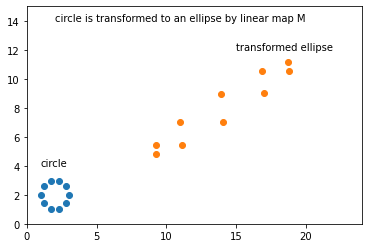

In [6]:
import math

centre = (2,2)
PI = math.pi
n = 10
r = 1

# circum_vectors are the vector points at the circumference of this unit circle.
circum_vectors = [np.array((centre[0] + math.cos(2*PI/n*x)*r, centre[1] + math.sin(2*PI/n*x)*r)) for x in range(0,n)]

# Now, we will transform these circum_vectors using M.
transformed_vectors = []
for v in circum_vectors:
    transformed_vectors.append(M @ v)


# Now, let's visualize how this mapping change the shape of circle.
pyplot.annotate("circle", [1,4])
pyplot.scatter([p[0] for p in circum_vectors], [p[1] for p in circum_vectors])

pyplot.annotate("transformed ellipse", [15, 12])
pyplot.scatter([p[0] for p in transformed_vectors], [p[1] for p in transformed_vectors])


pyplot.annotate("circle is transformed to an ellipse by linear map M", [2, 14])
pyplot.xlim(0, 24)
pyplot.ylim(0, 15)
pyplot.show()

So, we can see that this circle is transformed into an ellipse. This is because each vector point is scaled and rotated which result in this transformed ellipse. *Every point on the circle has an one-to-one mapping with points on the ellipse as the mapping is linear.*

### Matrix factorization and SVD

Matrix factorization is the most power-full tool in linear algebra, it is used extensively not just in mathematics but also in the field of data science and machine learning. Recommender systems uses matrix factorization heavily. The *idea is to factorize an unknown matrix into pieces whose properties are known to us or who are easy to manipulate.* There are many matrix factorization available but the most popular and fundamental is Singular value decomposition (SVD). *Any matrix no matter of what shape can be decomposed into three matrices using SVD.*

We can decompose any linear transformation M into 3 transformations. These are -
* first rotating using V_T (right singular vectors)
* then scaling using S (singular values)
* then again rotating using U (left singular vectors)

Here V_T, S, U are decomposed matrices of M. *So, any linear map can be decomposed into these three fundamental transformations, and this decomposition is called* **Singular value decomposition (SVD)**.

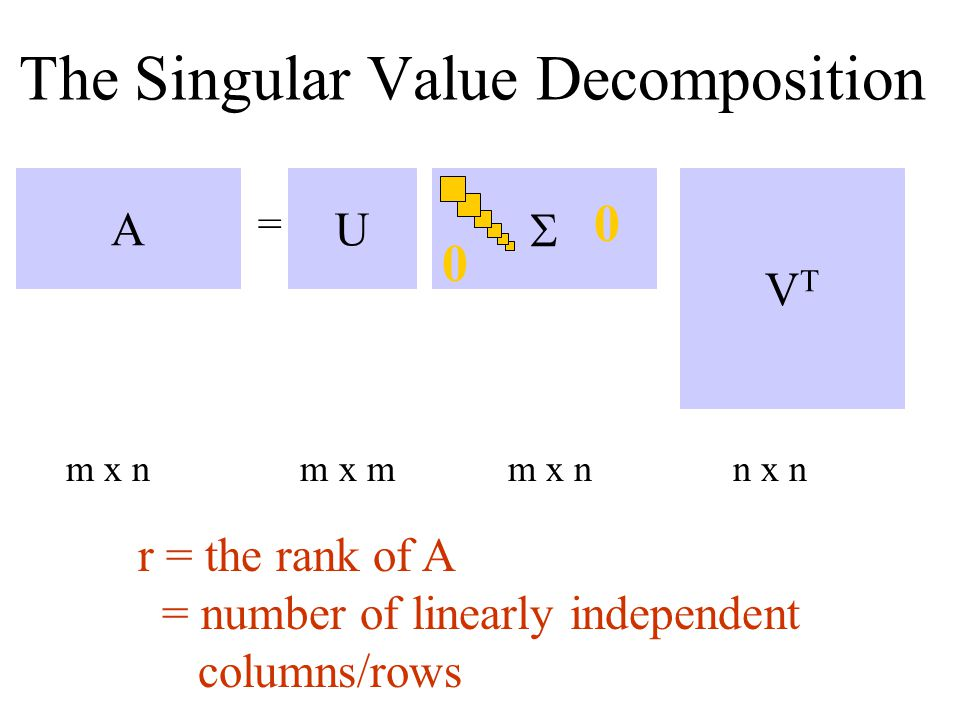

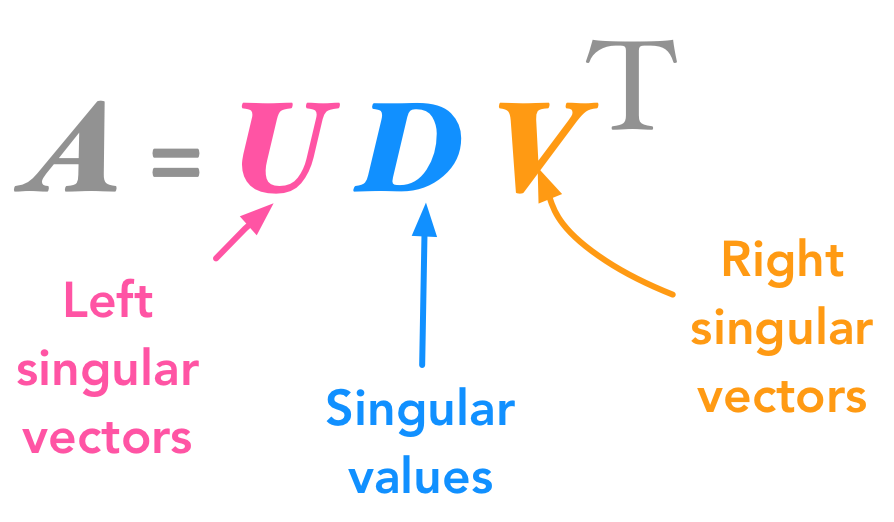

In [7]:
# Let's apply SVD to the linear map M we used earlier.
U, S, V_T = np.linalg.svd(M)
U, S , V_T

(array([[-0.85065081, -0.52573111],
        [-0.52573111,  0.85065081]]),
 array([5.85410197, 0.85410197]),
 array([[-0.52573111, -0.85065081],
        [-0.85065081,  0.52573111]]))

### Transforming using SVD
Now, we will transform above unit circle centered at (2,2) using these decomposed transformations in sequential manner and will see that indeed the end result is same as before.

**Whether apply M directly or first apply V_T then S and then U, will always gives the same result**. See below image,

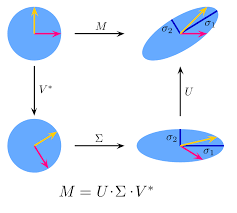

In [8]:
# first rotating using V_T
VT_transformed = []
for v in circum_vectors:
    VT_transformed.append(V_T @ v)

# then scaling using S
S_transformed = []
for v in VT_transformed:
    S_transformed.append(S * v)
    
# then again rotating using U
U_transformed = []
for v in S_transformed:
    U_transformed.append(U @ v)

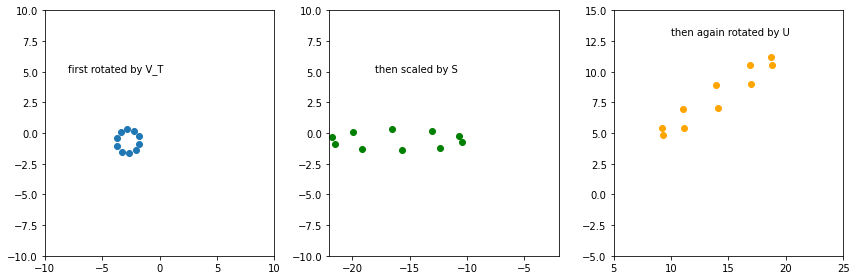

In [9]:
# Now, let's plot these transformations individually.

fig = pyplot.figure(1, (12, 4))


ax1 = pyplot.subplot(1,3,1)
ax1.annotate("first rotated by V_T", [-8, 5])
ax1.scatter([p[0] for p in VT_transformed], [p[1] for p in VT_transformed])
ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)

ax2 = pyplot.subplot(1,3,2)
ax2.annotate("then scaled by S", [-18, 5])
ax2.scatter([p[0] for p in S_transformed], [p[1] for p in S_transformed], c="g")
ax2.set_xlim(-22, -2)
ax2.set_ylim(-10, 10)

ax3 = pyplot.subplot(1,3,3)
ax3.annotate("then again rotated by U", [10, 13])
ax3.scatter([p[0] for p in U_transformed], [p[1] for p in U_transformed], c="orange")
ax3.set_xlim(5, 25)
ax3.set_ylim(-5, 15)


pyplot.tight_layout()
pyplot.show()

**So, V_T rotated the original circle, then S scaled this rotated circle and finally U again rotate this scaled circle. All are done sequentially.**

So, we can see that indeed the end result is exactly the same. Note, these images are on different scale(see x ticks), this is done because if we plot all of them on same scale then circle will look very tiny.

## Image compression using SVD

Now we will use this extremely powerful tool to compress images. We will see that how **the outer product of u and v corresponding to few topmost singular values can approximate the original image really well while reducing the image size significantly**.

### Compressing dummy image

In this section we will take a very small 7x7 dummy image. We first apply SVD to it, then see all the rank 1 images corresponding to all singular values. Then we will **construct best rank i image by cumulating all rank 1 images corresponding to singular values from 1 to i**.

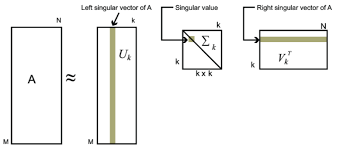

In [10]:
np.random.seed(42)

IMG = np.random.randint(0,2,(7,7))
IMG

array([[0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 1]])

In [11]:
np.linalg.matrix_rank(IMG)

6

**Rank of a matrix is defined as the number of independent rows/columns in that matrix. It is always less then the minimum of number of rows and columns in that matrix.**

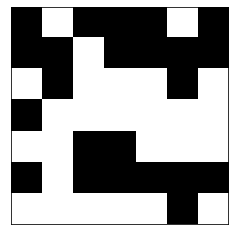

In [12]:
def plot_img(img):
    pyplot.imshow(img, cmap="gray")
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.show()
    
    
plot_img(IMG)

In [13]:
# Now, we will decompose this image using SVD.
U, S, V_T = np.linalg.svd(IMG)

U.shape, S.shape, V_T.shape

((7, 7), (7,), (7, 7))

In [14]:
with np.printoptions(precision=1):
    print("U: \n", U, "\n")
    print("V_T: \n", V_T)

U: 
 [[-1.5e-01 -5.9e-01 -2.2e-01  2.4e-02  1.9e-01  7.4e-01 -2.1e-16]
 [-8.5e-02  2.0e-01 -4.7e-01 -3.0e-02  8.3e-01 -2.1e-01  1.6e-16]
 [-4.5e-01  5.3e-01  1.7e-01  1.3e-01  2.6e-02  3.7e-01 -5.8e-01]
 [-5.3e-01 -1.5e-01 -5.4e-01  4.2e-01 -3.9e-01 -3.0e-01  2.7e-17]
 [-4.4e-01 -4.1e-01  6.2e-01  1.8e-01  3.4e-01 -3.3e-01  1.6e-16]
 [-9.3e-02 -3.1e-01 -1.4e-01 -6.8e-01 -1.1e-01 -2.6e-01 -5.8e-01]
 [-5.4e-01  2.2e-01  3.4e-02 -5.5e-01 -8.1e-02  1.1e-01  5.8e-01]] 

V_T: 
 [[-3.3e-01 -4.0e-01 -3.7e-01 -3.5e-01 -4.5e-01 -2.6e-01 -4.5e-01]
 [ 1.7e-01 -6.1e-01  4.0e-01  3.0e-01  9.6e-02 -5.7e-01  9.6e-02]
 [ 6.4e-01 -1.8e-01 -6.2e-01 -2.5e-01  2.3e-01 -1.0e-01  2.3e-01]
 [-2.5e-01 -6.4e-01 -2.8e-02  3.6e-03  2.0e-01  6.7e-01  2.0e-01]
 [ 4.1e-01 -7.3e-02  5.6e-01 -6.5e-01 -1.6e-01  2.0e-01 -1.6e-01]
 [ 4.7e-01 -8.6e-02 -7.1e-02  5.5e-01 -4.2e-01  3.3e-01 -4.2e-01]
 [ 0.0e+00  9.2e-17 -2.3e-16  4.0e-16 -7.1e-01 -6.6e-17  7.1e-01]]


In [15]:
print("S: ", np.around(S, decimals=4))

S:  [4.3372 2.0078 1.3004 0.9417 0.6827 0.3364 0.    ]


Below are all **rank 1 images.** These are constructed by taking the outer product of columns of U and rows of V_T and then multiplying/scaling by corresponding sigma value in S.

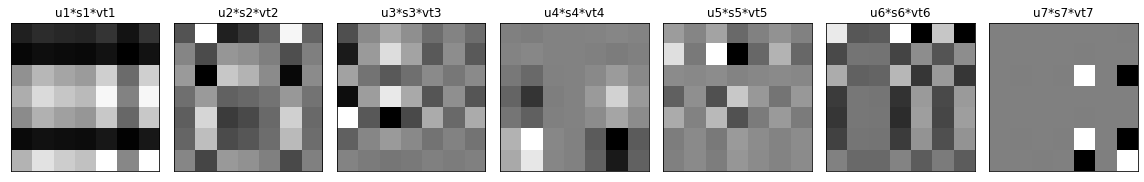

In [16]:
rank_1_images = []

fig = pyplot.figure(1, (16,8))

for idx,(u,s,v_t) in enumerate(zip(U.T, S, V_T)):
    ax = pyplot.subplot(1,7,idx+1)
    rank_1_img = s * np.outer(u, v_t)
    rank_1_images.append(rank_1_img)
    ax.imshow(rank_1_img, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"u{idx+1}*s{idx+1}*vt{idx+1}")
    pyplot.tight_layout()

We will use these rank 1 images to construct the image close to original image. We do this by cumulative sum of rank 1 images. Also by doing this we increase the rank of the matrix and hence information stored i.e., the constructed image will resemble more close to the original image as we cumulate more and more rank 1 images.

**Note:** At any step that approximated image is the best possible approximation of that rank for that image.

#### Best rank 1 approximation

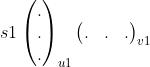

The best rank 1 image is nothing but just the outer product of u1 with v1 and scaled by s1.

In [17]:
IMG_rank1 = S[0] * np.outer(U[:, 0], V_T[0, :])

with np.printoptions(precision=2):
    print("IMG_rank1: \n", IMG_rank1)

IMG_rank1: 
 [[0.22 0.27 0.24 0.23 0.3  0.17 0.3 ]
 [0.12 0.15 0.14 0.13 0.17 0.09 0.17]
 [0.64 0.78 0.72 0.68 0.88 0.5  0.88]
 [0.75 0.92 0.84 0.8  1.03 0.58 1.03]
 [0.62 0.76 0.7  0.66 0.85 0.48 0.85]
 [0.13 0.16 0.15 0.14 0.18 0.1  0.18]
 [0.77 0.95 0.87 0.82 1.06 0.6  1.06]]


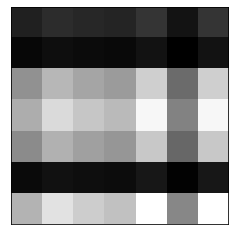

In [18]:
plot_img(IMG_rank1)

#### Best rank 2 approximation

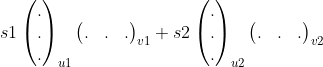

The best rank 2 image is the sum of rank 1 image and outer product of u2 with v2 and scaled by s2.

In [19]:
IMG_rank2 = S[0] * np.outer(U[:, 0], V_T[0, :]) + \
            S[1] * np.outer(U[:, 1], V_T[1, :])

with np.printoptions(precision=2):
    print("IMG_rank2: \n", IMG_rank2)

IMG_rank2: 
 [[ 0.02  0.99 -0.23 -0.13  0.18  0.85  0.18]
 [ 0.19 -0.1   0.3   0.25  0.2  -0.13  0.2 ]
 [ 0.82  0.13  1.14  1.    0.98 -0.11  0.98]
 [ 0.7   1.1   0.72  0.71  1.    0.75  1.  ]
 [ 0.48  1.27  0.37  0.41  0.77  0.96  0.77]
 [ 0.03  0.54 -0.1  -0.04  0.12  0.45  0.12]
 [ 0.85  0.67  1.05  0.96  1.1   0.35  1.1 ]]


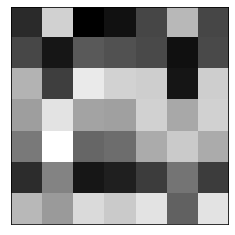

In [20]:
plot_img(IMG_rank2)

#### Best higher rank approximation

Similarly, **the best rank i image is the sum of rank (i-1) image and outer product of ui with vi scaled by si**.

We will **construct best rank i image by cumulating all rank 1 images corresponding to singular values from 1 to i**.

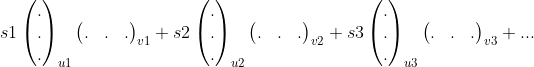

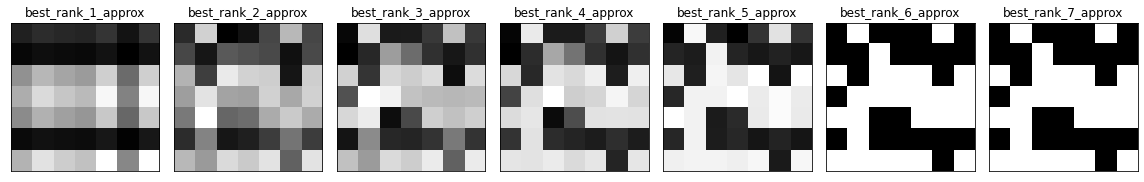

In [21]:
fig = pyplot.figure(1, (16,8))

for i in range(1,len(S)+1):
    best_rank_i_approx = np.zeros_like(IMG, dtype="float64")
    for j in range(i):
        best_rank_i_approx += rank_1_images[j]
        
    ax = pyplot.subplot(1,7,i)
    ax.imshow(best_rank_i_approx, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"best_rank_{i}_approx")
    pyplot.tight_layout()

We can see as we add more and more rank 1 images the approximated image get more and more close to original image and finally we get the original image.

**If the rank of image is r then adding all r rank 1 images gives us the same original image.**

But we won't go till rank r after all it will give us no benefit and even require more space. So we stop earlier, in this case most of us will stop at **best rank 4 or 5 approximation**, because it gives an image close enough to the original image so that we get an good idea of what the image is. Also in this case all of us will stop at **best rank 6 approximation**, because rank_7 is same as rank_6. This is because, as the image is rank 6, the last singular value is 0, so it will not add anything to the image.

Let's see how much space we saved by using best rank 3 image.

In [22]:
# these spaces are in units

original_space = 7*7
print("original space: ", original_space)

best_rank_3_space = 3*(7+7) + 3
print("best_rank_3_space: ", best_rank_3_space)

space_saved = 1 - best_rank_3_space / original_space
print(f"space saved: {space_saved * 100} %")

original space:  49
best_rank_3_space:  45
space saved: 8.163265306122447 %


So, even in the case of extremely tiny 7x7 image we saved around 8% space with a rank 3 approximation. Although this saving is not a lot as we are also compromising with the image quality, but in case of real life bigger images we save a lot space keeping the image quality almost same.

### Compressing real image

For simplicity I am taking only gray-scale image. But the method can be easily mapped to colored images as well.

(615, 926, 3)


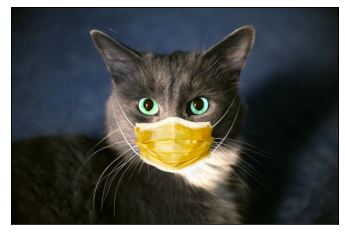

In [23]:
import cv2
import requests

IMG_URL = "https://images.theconversation.com/files/350865/original/file-20200803-24-50u91u.jpg?ixlib=rb-1.1.0&rect=37%2C29%2C4955%2C3293&q=45&auto=format&w=926&fit=clip"

img_data = requests.get(IMG_URL).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
    

image = cv2.imread("image.jpg")
print(image.shape)

plot_img(image)

(300, 400)


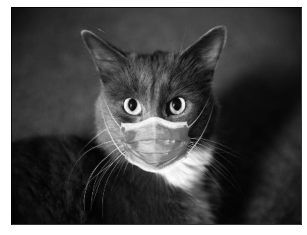

In [24]:
IMG_CAT = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# This image is very large in resolution so I am resizing it to smaller size.
IMG_CAT = cv2.resize(IMG_CAT, (400, 300))
print(IMG_CAT.shape)

plot_img(IMG_CAT)

In [25]:
np.linalg.matrix_rank(IMG_CAT)

300

In [26]:
# Rank of the image is 300 (which is a lot). Let's decompose it.

U, S, V_T = np.linalg.svd(IMG_CAT)
U.shape, S.shape, V_T.shape

((300, 300), (300,), (400, 400))

Below are some rank 1 images corresponding to the top singular values.

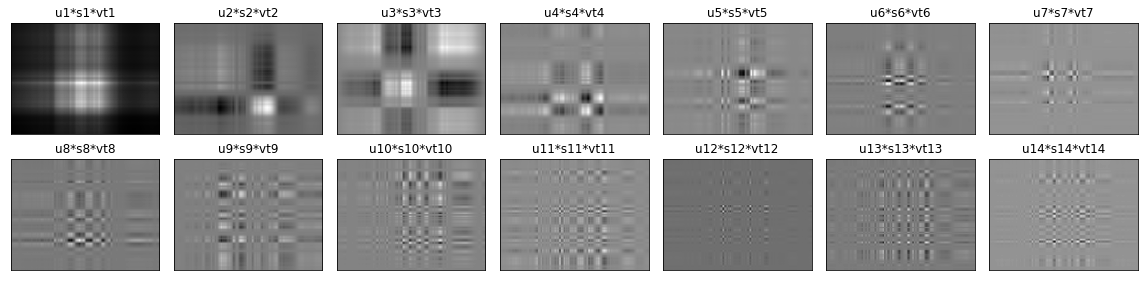

In [27]:
rank_i_images = []

fig = pyplot.figure(1, (16,4))

for idx,(u,s,v_t) in enumerate(zip(U.T, S, V_T)):
    if idx >= 14:
        break
    ax = pyplot.subplot(2,7,idx+1)
    rank_i_img = s * np.outer(u, v_t)
    rank_i_images.append(rank_i_img)
    ax.imshow(rank_i_img, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"u{idx+1}*s{idx+1}*vt{idx+1}")

pyplot.tight_layout()

Clearly we are not able to guess anything from these rank 1 images but magic will happen when we start cumulating them.

We would require some helper functions.

In [28]:
def svd(img, full_matrices=False):
    U, S, VT = np.linalg.svd(img, full_matrices=full_matrices)
    return (U, np.diag(S), VT)


def perc_storage(rank, n_rows, n_cols):
    original_space = n_rows*n_cols
    compressed_space = n_rows*rank + rank + n_cols*rank
    return compressed_space / original_space * 100


def perc_energy(S, r):
    return (np.trace(S[:r]) / np.trace(S)) * 100

As the SVD from numpy linalg package throws S not as a matrix but as array of values, so I defined a function which throws S as a diagonal matrix.

**perc_storage:** Returns the percentage of storage taken by the compressed image.

**perc_energy:** Returns the percentage of energy(sum of sigmas) taken by the compressed image.

As we need to decide the rank of image upto which we want to compress, but this can't be done manually as this vary image to image. So, we will use the below functions for that, which returns optimal rank for given energy and storage.

In [29]:
def get_optimal_rank_by_energy(S, max_energy):
    max_rank_ = S.shape[0]
    opt_rank_ = 1
    
    while opt_rank_ <= max_rank_:
        energy = perc_energy(S, opt_rank_)
        if energy < max_energy:
            opt_rank_ += 1
            continue
        elif energy > max_energy:
            return opt_rank_ - 1
        else:
            return opt_rank_
    

def get_optimal_rank_by_storage(S, max_storage):
    max_rank_ = S.shape[0]
    opt_rank_ = 1
    
    while opt_rank_ <= max_rank_:
        storage = perc_storage(opt_rank_, *S.shape)
        if storage < max_storage:
            opt_rank_ += 1
            continue
        if storage > max_storage:
            return opt_rank_ - 1
        else:
            return opt_rank_

**get_optimal_rank_by_energy:** Gives the lowest rank for the given amount of energy.

**get_optimal_rank_by_storage:** Gives the lowest rank for the given amount of storage.

Let's decompose the image using SVD.

In [30]:
%%time
U, S_mat, V_T = svd(IMG_CAT)

print(f'U: {U.shape},   S: {S_mat.shape},   VT: {V_T.shape}')
print('\n')

U: (300, 300),   S: (300, 300),   VT: (300, 400)


CPU times: user 49.6 ms, sys: 5.09 ms, total: 54.7 ms
Wall time: 27.7 ms


In [31]:
%%time

MAX_ENERGY=85 # in percentage
MAX_STORAGE=30 # in percentage

# We will find the optimal rank using above defined functions.

opt_rank_by_energy = get_optimal_rank_by_energy(S_mat, MAX_ENERGY)
opt_rank_by_storage = get_optimal_rank_by_storage(S_mat, MAX_STORAGE)

print(f'optimum rank for {MAX_ENERGY}% energy is {opt_rank_by_energy}')
print(f'optimum rank for {MAX_STORAGE}% storage is {opt_rank_by_storage}')

print("\n")

optimum rank for 85% energy is 82
optimum rank for 30% storage is 44


CPU times: user 3.79 ms, sys: 0 ns, total: 3.79 ms
Wall time: 1.85 ms


So we get the optimal rank for 85% energy and 30% storage.

Now let's visualize compressed images of different ranks and compare them with original image.

CPU times: user 301 ms, sys: 20 ms, total: 321 ms
Wall time: 160 ms


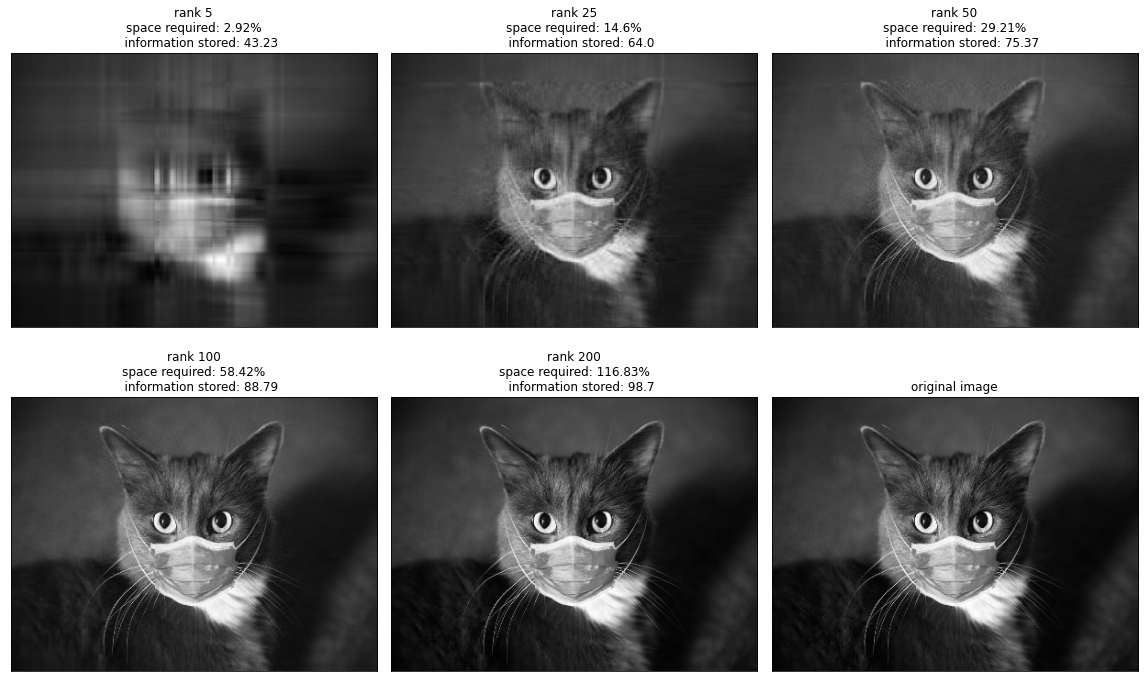

In [32]:
%%time

n_rows, n_cols = IMG_CAT.shape
RANKS = [5, 25, 50, 100, 200]

fig = pyplot.figure(0, (16, 10))

for idx, r in enumerate(RANKS):
    X_r = U[:, :r] @ S_mat[:r, :r] @ V_T[:r, :]

    ax = pyplot.subplot(2,3, idx+1)
    ax.imshow(X_r, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(f'''rank {r}\nspace required: {round(perc_storage(r, n_rows, n_cols), 2)}%
    information stored: {round(perc_energy(S_mat, r), 2)}''')
        
ax = pyplot.subplot(2, 3, idx+2)
ax.imshow(IMG_CAT, cmap='gray')
ax.set_title('original image')
ax.set_xticks([])
ax.set_yticks([])

pyplot.tight_layout()

*We can see that rank 50 is a very good approximation, as it contains 75% information content keeping the storage requirement below 30%. So, we get 75% information by reducing 71% space, which is a lot saving keeping the image content very enriched.
*

Many of us will stop at rank 50 approximation, some of us may go till rank 75 approximation and those you wants more clear image may go till rank 100. But the idea is there is always a trade between **information retained** and **space required**. It depends on your needs, if you want more quality image then you may go to higher rank approximations providing more image space but if space is limited to you then you will stop at initial ranks retaining maximum information in given space limits.

**Below is the plot showing the trade-off of rank with different attributes.**

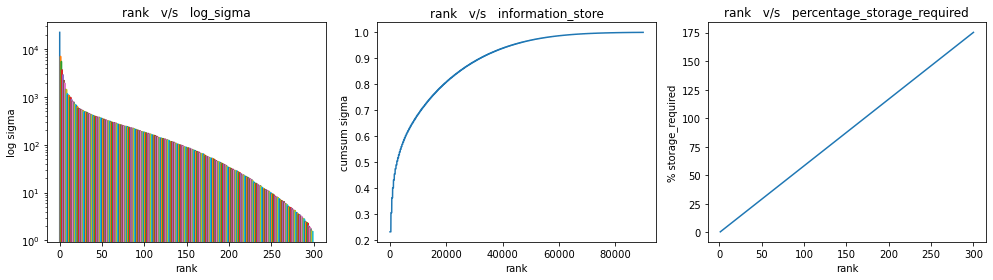

In [33]:
fig = pyplot.figure(0, (14, 4))

ax1 = pyplot.subplot(1, 3, 1)
ax1.semilogy(np.diag(S))
ax1.set_xlabel('rank')
ax1.set_ylabel('log sigma')
ax1.set_title('rank   v/s   log_sigma')

ax2 = pyplot.subplot(1, 3, 2)
ax2.plot(np.cumsum(np.diag(S) / np.sum(np.diag(S))))
ax2.set_xlabel('rank')
ax2.set_ylabel('cumsum sigma')
ax2.set_title('rank   v/s   information_store')


perc_strg = []
x_ticks = []
rank = np.linalg.matrix_rank(IMG_CAT)
for r in np.linspace(1, rank, 10):
    x_ticks.append(r)    
    perc_strg.append(perc_storage(r, n_rows, n_cols))


ax3 = pyplot.subplot(1, 3, 3)
ax3.plot(x_ticks, perc_strg)
ax3.set_xlabel('rank')
ax3.set_ylabel('% storage_required')
ax3.set_title('rank   v/s   percentage_storage_required')

pyplot.tight_layout()

**If you like this notebook then do up-vote and also share with others.**

[Here](https://medium.com/@greatsharma04/compressing-images-using-linear-algebra-bdac64c5e7ef) is the medium version of this notebook, have a read.

Also, have a read of my other notebooks which includes variety of topics including,
* [statistical analysis in python](https://www.kaggle.com/gauravsharma99/statistical-analysis-on-mpg-data)
* [multi-collinearity in linear-regression](https://www.kaggle.com/gauravsharma99/effect-of-multicollinearity-on-linear-regression)
* [facial emotion recognition using keras](https://www.kaggle.com/gauravsharma99/facial-emotion-recognition)

and [many more](https://www.kaggle.com/gauravsharma99/notebooks).

Thankyou once again for reading my kernels my friends :)